<a href="https://colab.research.google.com/github/hammaad2002/AdversarialAttack/blob/main/Adversarial_Attack_on_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install adversarial-robustness-toolbox[Keras]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 4.9 MB/s 


In [2]:
import tensorflow as tf

tf.compat.v1.disable_eager_execution()
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
import numpy as np

from art.attacks.evasion import FastGradientMethod
from art.estimators.classification import KerasClassifier
from art.utils import load_mnist

# Step 1: Load the MNIST dataset

(x_train, y_train), (x_test, y_test), min_pixel_value, max_pixel_value = load_mnist()

# Step 2: Create the model

model = Sequential()
model.add(Conv2D(filters=4, kernel_size=(5, 5), strides=1, activation="relu", input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=10, kernel_size=(5, 5), strides=1, activation="relu", input_shape=(23, 23, 4)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(100, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.compile(loss=categorical_crossentropy, optimizer=Adam(learning_rate=0.01), metrics=["accuracy"])

# Step 3: Create the ART classifier

classifier = KerasClassifier(model=model, clip_values=(min_pixel_value, max_pixel_value), use_logits=False)

# Step 4: Train the ART classifier

classifier.fit(x_train, y_train, batch_size=64, nb_epochs=3)

# Step 5: Evaluate the ART classifier on benign test examples

predictions = classifier.predict(x_test)
accuracy = np.sum(np.argmax(predictions, axis=1) == np.argmax(y_test, axis=1)) / len(y_test)
print("Accuracy on benign test examples: {}%".format(accuracy * 100))

# Step 6: Generate adversarial test examples

attack = FastGradientMethod(estimator=classifier, eps=0.2)
x_test_adv = attack.generate(x=x_test)

# Step 7: Evaluate the ART classifier on adversarial test examples

predictions = classifier.predict(x_test_adv)
accuracy = np.sum(np.argmax(predictions, axis=1) == np.argmax(y_test, axis=1)) / len(y_test)
print("Accuracy on adversarial test examples: {}%".format(accuracy * 100))

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 37s 615us/sample - loss: 0.1569 - accuracy: 0.9513
Epoch 2/3
60000/60000 [==============================] - 26s 440us/sample - loss: 0.0814 - accuracy: 0.9762
Epoch 3/3
60000/60000 [==============================] - 29s 481us/sample - loss: 0.0726 - accuracy: 0.9786


/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2067: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Accuracy on benign test examples: 97.43%
Accuracy on adversarial test examples: 46.07%


In [3]:
from art.utils import load_mnist
(x_train, y_train), (x_test, y_test), min_pixel_value, max_pixel_value = load_mnist()

test shape: (10000, 28, 28, 1)


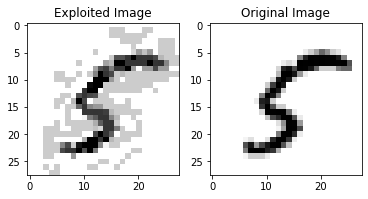

In [11]:
import matplotlib.pyplot as plt
import tensorflow as tf
import random as rn
temp= rn.randint(0,10000)
x1 = x_test_adv[temp]
x2 = x_test[temp]
x1 = tf.convert_to_tensor(x1)
x2 = tf.convert_to_tensor(x2)
x1_new = tf.reshape(x1, (28, 28))
x2_new = tf.reshape(x2, (28, 28))
x1_new = x1_new.eval(session=tf.compat.v1.Session())
x2_new = x2_new.eval(session=tf.compat.v1.Session())
plt.subplot(121)
plt.imshow(x1_new,cmap=plt.cm.binary)
plt.title('Exploited Image')
plt.subplot(122)
print("test shape:",x_test.shape)
plt.imshow(x2_new,cmap=plt.cm.binary)
plt.title('Original Image')
plt.show()

In [12]:
predictions = classifier.predict( [x_test_adv[temp],]  )
print("Prediction after performing attack: ",np.argmax(predictions))
print("Ground truth: ",np.argmax(y_test[temp]))

Prediction after performing attack:  0
Ground truth:  5
